## Chirp.

We construct chirp data with some gaussian noise.

We want to fit a smooth model to the data: SplinesDynamicModel with unknown knot number and locations.


In [1]:
import numpy as numpy
import math

from astropy.io import ascii

from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt

from BayesicFitting import SplinesDynamicModel

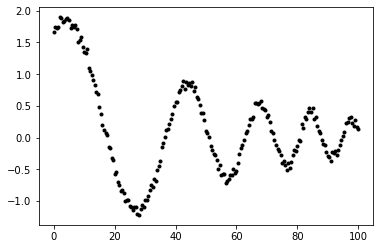

In [3]:
t = numpy.linspace( 0, 100, 201, dtype=float )
ym = 2 * numpy.sin( 2 * math.pi * numpy.exp( t / 60 ) +1 ) * numpy.exp( -0.02 * t )
y = numpy.random.seed( 12345 )
y = ym + numpy.random.randn( 201 ) * 0.05
plt.plot( t, y, 'k.' )
plt.show()

In [5]:
knots =[0, 30, 60, 100]
mxk = 15
mdl = SplinesDynamicModel( knots=knots, dynamic=True, maxKnots=mxk, minKnots=4, minDistance=0.03 )
mdl.setLimits( lowLimits=[-10.0], highLimits=[+10.0] )

# Tools.printclass( mdl )


Fit all parameters of
  DynModBasicSplines of order 3 with 4 knots.
Using a Gauss error distribution with unknown scale
Moving the walkers with   GalileanEngine  ChordEngine  BirthEngine  DeathEngine  StructureEngine
Iteration     logZ        H       LowL     npar parameters                                   scale
       0  -1.86e+07 3410977.8  -1.52e+07      9  [   -7.845   -2.338    8.776    9.863 ...    0.015]
     100  -7.07e+04   2972.2  -6.78e+04     12  [   -7.070   -2.902    1.192    0.288 ...    0.110]
     200  -7.00e+03    103.4  -6.90e+03     10  [   -9.187    0.034   -5.124   -6.331 ...    0.512]
     300  -2.62e+03     13.6  -2.61e+03      9  [    9.589   -7.783   -7.494   -8.264 ...    0.989]
     400  -1.83e+03     11.9  -1.82e+03     11  [   -3.656   -7.513    8.611    0.021 ...    0.826]
     500  -1.40e+03     15.4  -1.38e+03     12  [    4.033   -1.747    6.314   -3.601 ...    0.857]
     600  -1.12e+03     11.4  -1.11e+03     12  [    7.123   -4.390    0.595    0.8

    7900       160.     78.9       240.     15  [    1.652    2.909   -0.430   -1.443 ...    0.083]
    8000       162.     79.7       243.     15  [    1.700    2.379    0.598   -1.636 ...    0.076]
    8100       165.     80.8       247.     15  [    1.624    2.653    0.029   -1.653 ...    0.074]
    8200       168.     81.7       251.     15  [    1.559    2.863   -0.175   -1.607 ...    0.072]
    8300       171.     82.5       254.     15  [    1.588    2.683   -0.084   -1.499 ...    0.071]
    8400       173.     83.4       258.     15  [    1.651    2.653   -0.009   -1.566 ...    0.072]
    8500       175.     84.5       261.     15  [    1.544    2.760   -0.048   -1.700 ...    0.068]
    8600       178.     85.6       265.     15  [    1.623    2.804    0.360   -1.614 ...    0.069]
    8700       180.     86.6       268.     15  [    1.627    2.698   -0.047   -1.547 ...    0.069]
    8800       182.     87.3       271.     15  [    1.709    2.477    0.042   -1.673 ...    0.068]


   16100       197.    100.4       319.     15  [    1.623    2.788   -0.327   -1.549 ...    0.050]
   16200       197.    100.4       319.     15  [    1.623    2.798   -0.328   -1.547 ...    0.050]
   16300       197.    100.4       319.     15  [    1.620    2.792   -0.333   -1.545 ...    0.049]
   16400       197.    100.4       319.     15  [    1.628    2.787   -0.321   -1.542 ...    0.050]
   16500       197.    100.4       319.     15  [    1.624    2.791   -0.332   -1.543 ...    0.049]
   16600       197.    100.4       319.     15  [    1.624    2.775   -0.321   -1.550 ...    0.050]
   16700       197.    100.4       319.     15  [    1.619    2.793   -0.328   -1.547 ...    0.050]
   16800       197.    100.4       319.     15  [    1.626    2.786   -0.328   -1.544 ...    0.050]
   16900       197.    100.4       319.     15  [    1.627    2.777   -0.320   -1.548 ...    0.050]
   17000       197.    100.4       319.     15  [    1.628    2.779   -0.320   -1.548 ...    0.050]


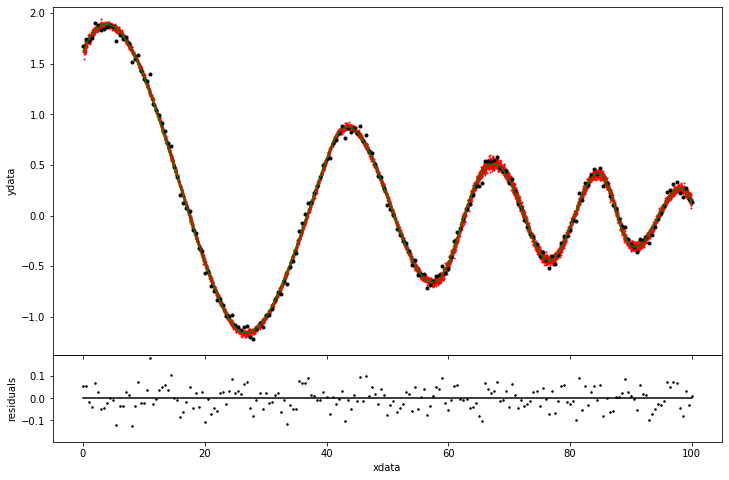

In [7]:
#eng = ["galilean", "birth", "death", "struct"]
ns = NestedSampler( t, mdl, y, seed=1235 )
ns.distribution.setLimits( [0.01,1] )
ns.minimumIterations = 1000
ns.verbose=2
#ns.engines[1].slow = 100

evid = ns.sample( plot=True )



In [8]:
sl = ns.samples
kmed = sl.getMedianIndex()
smpl = sl[kmed]
print( fmt( smpl.model.knots, max=None ) )
print( fmt( smpl.model.parameters, max=None ) )
print( fmt( sl[-1].model.knots, max=None ) )
print( fmt( sl[-1].model.parameters, max=None ) )

[    0.000   24.064   24.906   40.166   41.265   58.491   64.060   71.424   75.309   86.062   89.612  100.000]
[    1.672    2.495    0.234   -1.114   -0.945    2.595   -1.963    0.008    0.866   -0.710    0.202   -1.095    0.441
     0.503]
[    0.000   24.128   24.885   40.325   41.628   58.551   64.525   68.894   76.958   84.594   90.447  100.000]
[    1.672    2.495    0.234   -1.114   -0.945    2.595   -1.963    0.008    0.866   -0.710    0.202   -1.095    0.441
     0.503]


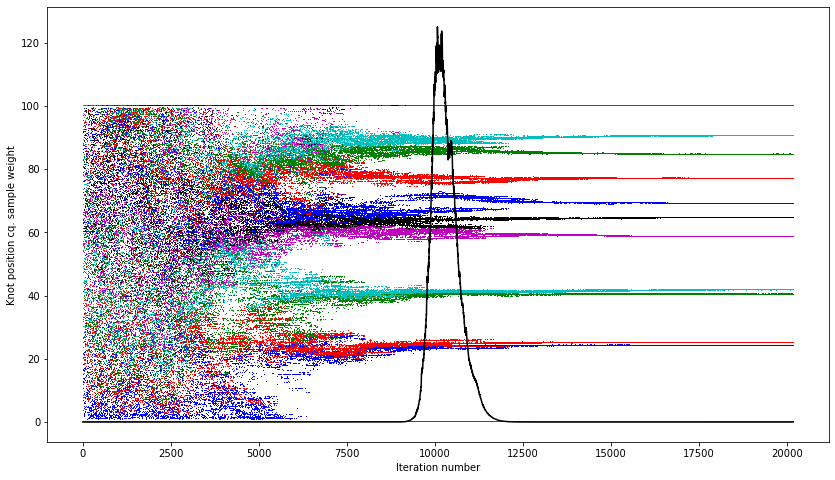

In [9]:
## Plot the evolutie of knots and sample weights
cc = ['k,', 'b,', 'r,', 'g,', 'c,', 'm,']
sl = ns.samples
ka = numpy.zeros( ( mxk, len( sl ) ), dtype=float )
for k,s in enumerate( sl ) :
    n = len( s.model.knots )
    ka[:n,k] = s.model.knots
plt.figure( 1, figsize=[14,8] )    
for j in range( mxk ) :
    plt.plot( ka[j,:], cc[j%6] )
wgts = sl.getWeightEvolution()
plt.plot( 100000 * wgts, 'k-' )
plt.xlabel( "Iteration number" )
plt.ylabel( "Knot position cq. sample weight")
plt.show()

